## **cluster dendogram**

- #### Input ที่ต้องการคือ matrix ที่แถวเป็นตัวอย่างและคอลัมน์เป็นตัวแปร และเป็นเมตริกซ์จัตุรัส

- #### โดยสามารถ transpose ข้อมูลได้โดยใช้ฟังก์ชั่น **t()**

- #### สามารถคำนวณความห่างระหว่างตัวอย่าง โดยใช้ฟังก์ชั่น **dis()** และ **cor()**

- #### ใช้ฟังก์ชั่น **hclust()** เพื่อเปลี่ยนเป็น hierarchical data 

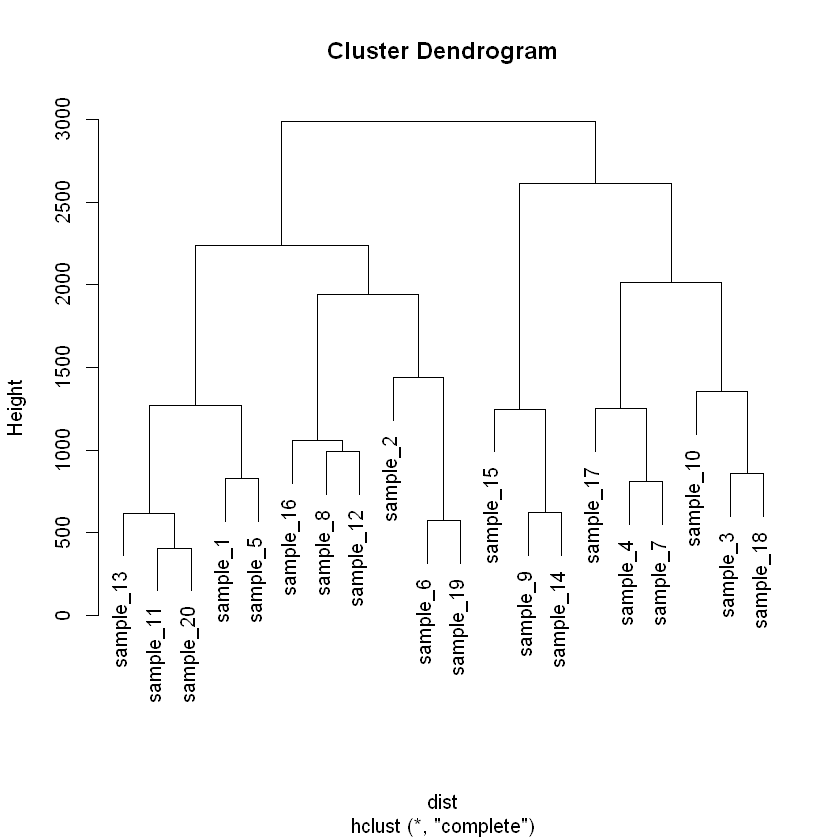

In [2]:
# Dataset 
data <- matrix( sample(seq(1,2000),200), ncol = 10 )
rownames(data) <- paste0("sample_" , seq(1,20))
colnames(data) <- paste0("variable",seq(1,10))

# Euclidean distance
dist <- dist(data[ , c(4:8)] , diag=TRUE)

# Hierarchical Clustering with hclust
hc <- hclust(dist)

# Plot the result
plot(hc)

## **การขยายเข้า(zoom)ในแต่ละกลุ่ม**

- #### ใช้เครืื่องหมาย **[[..]]**

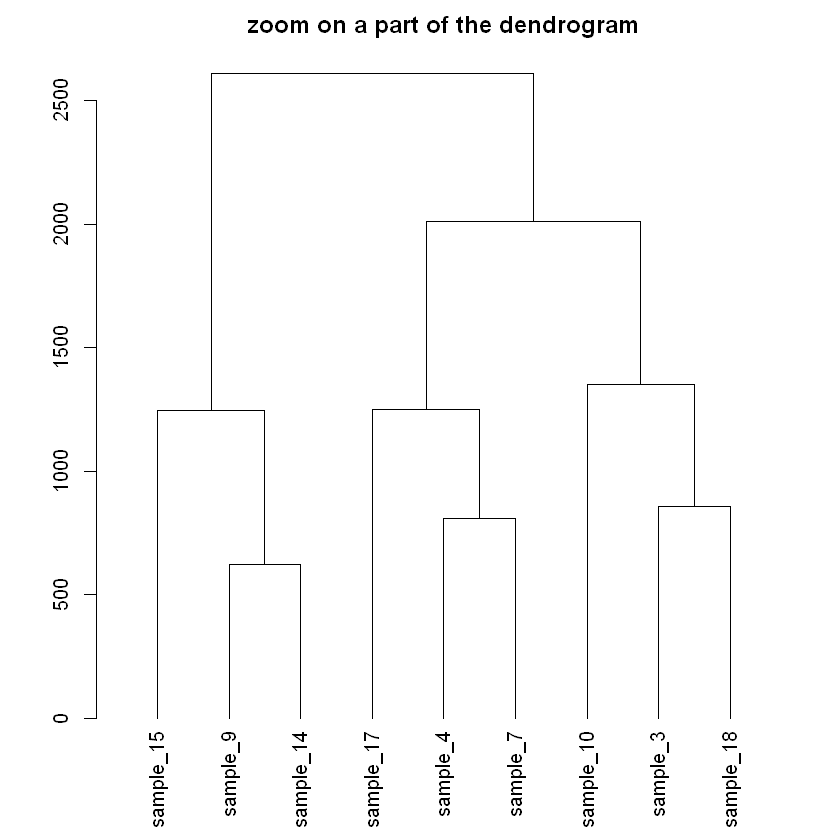

In [5]:
# store the dedrogram in an object
dhc <- as.dendrogram(hc)

# set the margin
par(mar=c(4,4,2,2))

# Plot the Second group
plot(dhc[[2]] , main= "zoom on a part of the dendrogram")

## **การกำหนดสีและlegend**

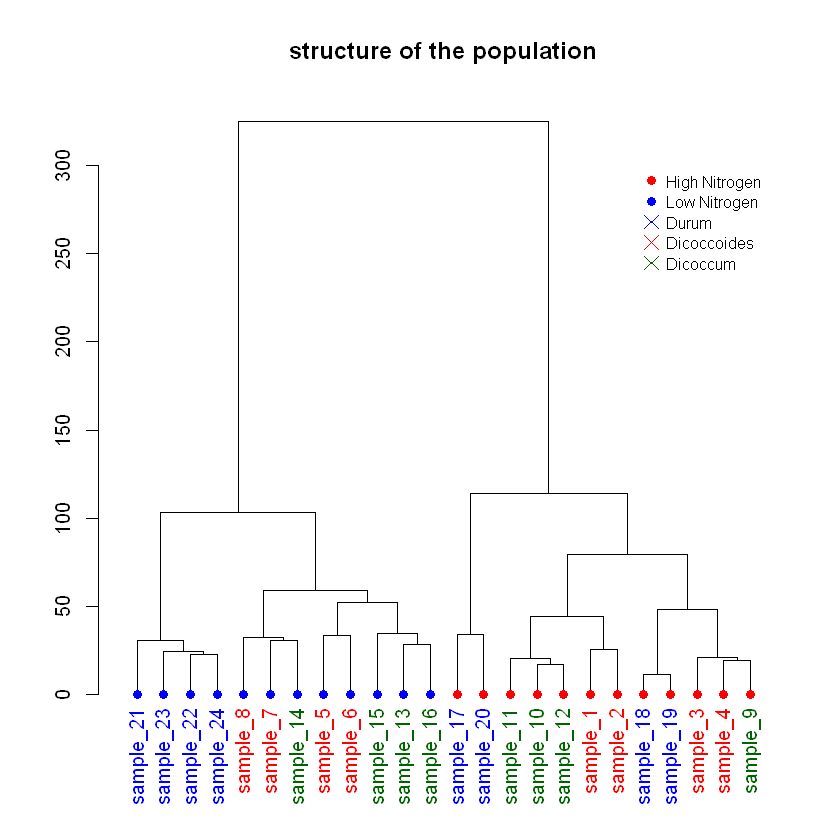

In [6]:
# Build dataset (just copy and paste, this is NOT interesting)
sample <- paste(rep("sample_",24) , seq(1,24) , sep="")
specie <- c(rep("dicoccoides" , 8) , rep("dicoccum" , 8) , rep("durum" , 8))
treatment <- rep(c(rep("High",4 ) , rep("Low",4)),3)
data <- data.frame(sample,specie,treatment)
for (i in seq(1:5)){
  gene=sample(c(1:40) , 24 )
  data=cbind(data , gene)
  colnames(data)[ncol(data)]=paste("gene_",i,sep="")
 }
data[data$treatment=="High" , c(4:8)]=data[data$treatment=="High" , c(4:8)]+100
data[data$specie=="durum" , c(4:8)]=data[data$specie=="durum" , c(4:8)]-30
rownames(data) <- data[,1]    

# Have a look to the dataset
# head(data)

# Compute Euclidean distance between samples
dist=dist(data[ , c(4:8)] , diag=TRUE)

# Perfor clustering with hclust
hc <- hclust(dist)
dhc <- as.dendrogram(hc)

# Actually, each leaf of the tree has several attributes, like the color, the shape.. Have a look to it: 
specific_leaf <- dhc[[1]][[1]][[1]]
# specific_leaf
# attributes(specific_leaf)

#So if I Want to color each leaf of the Tree, I have to change the attribute of each leaf. This can be done using the dendrapply function. So I create a function that # # add 3 attributes to the leaf : one for the color (“lab.col”) ,one for the font “lab.font” and one for the size (“lab.cex”).
i=0
colLab<<-function(n){
    if(is.leaf(n)){
        
        #I take the current attributes
        a=attributes(n)
        
        #I deduce the line in the original data, and so the treatment and the specie.
        ligne=match(attributes(n)$label,data[,1])
        treatment=data[ligne,3];
            if(treatment=="Low"){col_treatment="blue"};if(treatment=="High"){col_treatment="red"}
        specie=data[ligne,2];
            if(specie=="dicoccoides"){col_specie="red"};if(specie=="dicoccum"){col_specie="Darkgreen"};if(specie=="durum"){col_specie="blue"}
        
        #Modification of leaf attribute
        attr(n,"nodePar")<-c(a$nodePar,list(cex=1.5,lab.cex=1,pch=20,col=col_treatment,lab.col=col_specie,lab.font=1,lab.cex=1))
        }
    return(n)
}

# Finally I just have to apply this to my dendrogram
dL <- dendrapply(dhc, colLab)
 
# And the plot
plot(dL , main="structure of the population")
legend("topright", 
     legend = c("High Nitrogen" , "Low Nitrogen" , "Durum" , "Dicoccoides" , "Dicoccum"), 
     col = c("red", "blue" , "blue" , "red" , "Darkgreen"), 
     pch = c(20,20,4,4,4), bty = "n",  pt.cex = 1.5, cex = 0.8 , 
     text.col = "black", horiz = FALSE, inset = c(0, 0.1))